In [2]:
#Import fastf1
import fastf1 as ff1
import fastf1.plotting
from fastf1.core import Laps
from fastf1.core import SessionResults

In [3]:
#Libraries import
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from timple.timedelta import strftimedelta
import seaborn as sns

In [4]:
#Enable cache:argument is path
cache = ff1.Cache.enable_cache('/root/code/data_science/F1_data_analytics')

In [5]:
#Import the list of races
from fastf1.events import _get_schedule
year = _get_schedule(2023)
year.head()

,RoundNumber,Country,Location,OfficialEventName,EventDate,EventName,EventFormat,Session1,Session1Date,Session2,Session2Date,Session3,Session3Date,Session4,Session4Date,Session5,Session5Date,F1ApiSupport
0,0,Bahrain,Sakhir,FORMULA 1 ARAMCO PRE-SEASON TESTING 2023,2023-02-25 19:30:00,Pre-Season Testing,testing,Practice 1,2023-02-23 10:00:00,Practice 2,2023-02-24 10:00:00,Practice 3,2023-02-25 10:00:00,None,NaT,None,NaT,True
1,1,Bahrain,Sakhir,FORMULA 1 GULF AIR BAHRAIN GRAND PRIX 2023,2023-03-05 20:00:00,Bahrain Grand Prix,conventional,Practice 1,2023-03-03 14:30:00,Practice 2,2023-03-03 18:00:00,Practice 3,2023-03-04 14:30:00,Qualifying,2023-03-04 18:00:00,Race,2023-03-05 18:00:00,True
2,2,Saudi Arabia,Jeddah,FORMULA 1 STC SAUDI ARABIAN GRAND PRIX 2023,2023-03-19 22:00:00,Saudi Arabian Grand Prix,conventional,Practice 1,2023-03-17 16:30:00,Practice 2,2023-03-17 20:00:00,Practice 3,2023-03-18 16:30:00,Qualifying,2023-03-18 20:00:00,Race,2023-03-19 20:00:00,True
3,3,Australia,Melbourne,FORMULA 1 ROLEX AUSTRALIAN GRAND PRIX 2023,2023-04-02 17:00:00,Australian Grand Prix,conventional,Practice 1,2023-03-31 12:30:00,Practice 2,2023-03-31 16:00:00,Practice 3,2023-04-01 12:30:00,Qualifying,2023-04-01 16:00:00,Race,2023-04-02 15:00:00,True
4,4,Azerbaijan,Baku,FORMULA 1 AZERBAIJAN GRAND PRIX 2023,2023-04-30 17:00:00,Azerbaijan Grand Prix,sprint,Practice 1,2023-04-28 13:30:00,Qualifying,2023-04-28 17:00:00,Practice 2,2023-04-29 13:30:00,Sprint,2023-04-29 17:30:00,Race,2023-04-30 15:00:00,True


In [6]:
#Specify your session
YEAR = 2023
RACE = "Australia"
SESSION = "R"

# "SESSION" can either be 'FP1', 'FP2', 'FP3', 'Q', 'SQ', and 'R'
race = ff1.get_session(YEAR,RACE,SESSION)

In [7]:
#Load the session
race.load()

core           INFO 	Loading data for Australian Grand Prix - Race [v2.3.1]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
/root/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/fastf1/core.py:1415: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df = pd.concat([df, result], sort=False)
/root/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/fastf1/core.py:1415: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df = pd.c

api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
api            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '44', '14', '18', '11', '4', '27', '81', '24', '22', '77', '55', '10', '31', '21', '2', '20', '63', '23', '16']


In [8]:
# laps = session.laps
laps = race.load_laps(with_telemetry=True)
laps

/root/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/fastf1/core.py:1220: FutureWarning: `Session.load_laps` is deprecated and will beremoved in a future version.
Use `Session.load` instead.
  warnings.warn("`Session.load_laps` is deprecated and will be"
core           INFO 	Loading data for Australian Grand Prix - Race [v2.3.1]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
/root/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/fastf1/core.py:1415: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df = pd.concat([df, result], sort=False)
/ro

/root/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/fastf1/core.py:1411: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(new_last).reset_index(drop=True)
/root/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/fastf1/core.py:1415: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df = pd.concat([df, result], sort=False)
/root/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/fastf1/core.py:1411: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(new_last).reset_index(drop=True)
/root/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/fastf1/core.py:1415: FutureWarning: In a future version

,Time,DriverNumber,LapTime,LapNumber,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,...,Compound,TyreLife,FreshTyre,Stint,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate
0,0 days 01:03:58.732000,1,NaT,1.0,0 days 00:23:26.593000,NaT,NaT,0 days 00:00:18.707000,0 days 00:00:46.357000,NaT,...,MEDIUM,1.0,True,1,0 days 01:02:16.863000,Red Bull Racing,VER,24,False,2023-04-02 05:03:18.685
1,0 days 01:06:10.837000,1,0 days 00:02:12.105000,2.0,NaT,NaT,0 days 00:00:48.846000,0 days 00:00:31.614000,0 days 00:00:51.645000,0 days 01:04:47.578000,...,MEDIUM,2.0,True,1,0 days 01:03:58.732000,Red Bull Racing,VER,4,False,2023-04-02 05:05:00.554
2,0 days 01:08:21.494000,1,0 days 00:02:10.657000,3.0,NaT,NaT,0 days 00:00:46.836000,0 days 00:00:29.178000,0 days 00:00:54.643000,0 days 01:06:57.673000,...,MEDIUM,3.0,True,1,0 days 01:06:10.837000,Red Bull Racing,VER,4,False,2023-04-02 05:07:12.659
3,0 days 01:09:44.885000,1,0 days 00:01:23.391000,4.0,NaT,NaT,0 days 00:00:28.900000,0 days 00:00:18.326000,0 days 00:00:36.165000,0 days 01:08:50.394000,...,MEDIUM,4.0,True,1,0 days 01:08:21.494000,Red Bull Racing,VER,1,False,2023-04-02 05:09:23.316
4,0 days 01:11:07.989000,1,0 days 00:01:23.104000,5.0,NaT,NaT,0 days 00:00:28.935000,0 days 00:00:18.347000,0 days 00:00:35.822000,0 days 01:10:13.820000,...,MEDIUM,5.0,True,1,0 days 01:09:44.885000,Red Bull Racing,VER,1,True,2023-04-02 05:10:46.707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,0 days 01:09:48.004000,23,0 days 00:01:24.327000,4.0,NaT,NaT,0 days 00:00:29.279000,0 days 00:00:18.408000,0 days 00:00:36.640000,0 days 01:08:52.956000,...,MEDIUM,4.0,True,1,0 days 01:08:23.677000,Williams,ALB,1,False,2023-04-02 05:09:25.499
999,0 days 01:11:11.643000,23,0 days 00:01:23.639000,5.0,NaT,NaT,0 days 00:00:29.185000,0 days 00:00:18.308000,0 days 00:00:36.146000,0 days 01:10:17.189000,...,MEDIUM,5.0,True,1,0 days 01:09:48.004000,Williams,ALB,1,True,2023-04-02 05:10:49.826
1000,0 days 01:12:34.992000,23,0 days 00:01:23.349000,6.0,NaT,NaT,0 days 00:00:29.156000,0 days 00:00:18.316000,0 days 00:00:35.877000,0 days 01:11:40.799000,...,MEDIUM,6.0,True,1,0 days 01:11:11.643000,Williams,ALB,1,True,2023-04-02 05:12:13.465
1001,0 days 01:16:00.697000,23,NaT,7.0,NaT,NaT,NaT,NaT,NaT,NaT,...,MEDIUM,7.0,True,1,0 days 01:12:34.992000,Williams,ALB,24,False,2023-04-02 05:13:36.814


In [9]:
#Get a list of driver names
names = laps["Driver"].unique().tolist()
names

['VER',
 'HAM',
 'ALO',
 'STR',
 'PER',
 'NOR',
 'HUL',
 'PIA',
 'ZHO',
 'TSU',
 'BOT',
 'SAI',
 'GAS',
 'OCO',
 'DEV',
 'SAR',
 'MAG',
 'RUS',
 'ALB',
 'LEC']

In [10]:
#Iterate over driver names and pick from the laps object the fastest lap. Create a dictionary with driver name and faster lap
fastest_lap_car = {}
for name in names:
    lst = laps.pick_driver(name).pick_fastest()
    fastest_lap_car[name] =lst["LapTime"]

fastest_lap_car

/root/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/fastf1/core.py:2328: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  super().__init__(*args, **kwargs)


{'VER': Timedelta('0 days 00:01:20.342000'),
 'HAM': Timedelta('0 days 00:01:20.613000'),
 'ALO': Timedelta('0 days 00:01:20.476000'),
 'STR': Timedelta('0 days 00:01:20.934000'),
 'PER': Timedelta('0 days 00:01:20.235000'),
 'NOR': Timedelta('0 days 00:01:21.173000'),
 'HUL': Timedelta('0 days 00:01:21.124000'),
 'PIA': Timedelta('0 days 00:01:21.335000'),
 'ZHO': Timedelta('0 days 00:01:21.819000'),
 'TSU': Timedelta('0 days 00:01:21.789000'),
 'BOT': Timedelta('0 days 00:01:22.233000'),
 'SAI': Timedelta('0 days 00:01:20.467000'),
 'GAS': Timedelta('0 days 00:01:20.995000'),
 'OCO': Timedelta('0 days 00:01:21.203000'),
 'DEV': Timedelta('0 days 00:01:21.183000'),
 'SAR': Timedelta('0 days 00:01:21.456000'),
 'MAG': Timedelta('0 days 00:01:21.685000'),
 'RUS': Timedelta('0 days 00:01:22.680000'),
 'ALB': Timedelta('0 days 00:01:23.349000'),
 'LEC': nan}

In [11]:
#Clean the dictionary from timedelta and 0 days
fastest_lap_car = {k: str(v).split()[-1] for k, v in fastest_lap_car.items()}
fastest_lap_car

{'VER': '00:01:20.342000',
 'HAM': '00:01:20.613000',
 'ALO': '00:01:20.476000',
 'STR': '00:01:20.934000',
 'PER': '00:01:20.235000',
 'NOR': '00:01:21.173000',
 'HUL': '00:01:21.124000',
 'PIA': '00:01:21.335000',
 'ZHO': '00:01:21.819000',
 'TSU': '00:01:21.789000',
 'BOT': '00:01:22.233000',
 'SAI': '00:01:20.467000',
 'GAS': '00:01:20.995000',
 'OCO': '00:01:21.203000',
 'DEV': '00:01:21.183000',
 'SAR': '00:01:21.456000',
 'MAG': '00:01:21.685000',
 'RUS': '00:01:22.680000',
 'ALB': '00:01:23.349000',
 'LEC': 'nan'}

In [12]:
!git status


On branch main
Your branch is up to date with 'origin/main'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   Australia.ipynb
	modified:   F1_Saudi_Arabia.ipynb
	modified:   fastf1_http_cache.sqlite

no changes added to commit (use "git add" and/or "git commit -a")


In [13]:
!git add Australia.ipynb

In [14]:
!git commit -m "Corrected Australia"

[main 2d4f1c7] Corrected Australia
 1 file changed, 91 insertions(+), 8 deletions(-)


In [15]:
!git push origin main

Enumerating objects: 5, done.
Counting objects: 100% (5/5), done.
Delta compression using up to 8 threads
Compressing objects: 100% (3/3), done.
Writing objects: 100% (3/3), 798 bytes | 798.00 KiB/s, done.
Total 3 (delta 2), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To github.com:ztrend/data_science.git
   107ae42..2d4f1c7  main -> main


In [16]:
#Give you one specific driver
ham_laps = laps.pick_driver('HAM')
ham_laps

,Time,DriverNumber,LapTime,LapNumber,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,...,Compound,TyreLife,FreshTyre,Stint,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate
58,0 days 01:03:57.394000,44,NaT,1.0,0 days 00:26:50.669000,NaT,NaT,0 days 00:00:18.733000,0 days 00:00:45.558000,NaT,...,MEDIUM,1.0,True,1,0 days 01:02:16.863000,Mercedes,HAM,24,False,2023-04-02 05:03:18.685
59,0 days 01:06:09.681000,44,0 days 00:02:12.287000,2.0,NaT,NaT,0 days 00:00:48.710000,0 days 00:00:31.804000,0 days 00:00:51.773000,0 days 01:04:46.104000,...,MEDIUM,2.0,True,1,0 days 01:03:57.394000,Mercedes,HAM,4,False,2023-04-02 05:04:59.216
60,0 days 01:08:21.043000,44,0 days 00:02:11.362000,3.0,NaT,NaT,0 days 00:00:47.074000,0 days 00:00:29.262000,0 days 00:00:55.026000,0 days 01:06:56.755000,...,MEDIUM,3.0,True,1,0 days 01:06:09.681000,Mercedes,HAM,4,False,2023-04-02 05:07:11.503
61,0 days 01:09:44.338000,44,0 days 00:01:23.295000,4.0,NaT,NaT,0 days 00:00:28.776000,0 days 00:00:18.722000,0 days 00:00:35.797000,0 days 01:08:49.819000,...,MEDIUM,4.0,True,1,0 days 01:08:21.043000,Mercedes,HAM,1,False,2023-04-02 05:09:22.865
62,0 days 01:11:07.508000,44,0 days 00:01:23.170000,5.0,NaT,NaT,0 days 00:00:28.837000,0 days 00:00:18.471000,0 days 00:00:35.862000,0 days 01:10:13.175000,...,MEDIUM,5.0,True,1,0 days 01:09:44.338000,Mercedes,HAM,1,True,2023-04-02 05:10:46.160
63,0 days 01:12:30.398000,44,0 days 00:01:22.890000,6.0,NaT,NaT,0 days 00:00:28.755000,0 days 00:00:18.248000,0 days 00:00:35.887000,0 days 01:11:36.263000,...,MEDIUM,6.0,True,1,0 days 01:11:07.508000,Mercedes,HAM,1,True,2023-04-02 05:12:09.330
64,0 days 01:14:04.542000,44,0 days 00:01:34.144000,7.0,NaT,NaT,0 days 00:00:28.603000,0 days 00:00:18.313000,0 days 00:00:47.228000,0 days 01:12:59.001000,...,MEDIUM,7.0,True,1,0 days 01:12:30.398000,Mercedes,HAM,24,False,2023-04-02 05:13:32.220
65,0 days 01:16:56.930000,44,NaT,8.0,NaT,0 days 01:16:42.134000,0 days 00:00:49.426000,0 days 00:00:45.424000,0 days 00:01:17.480000,0 days 01:14:54.026000,...,MEDIUM,8.0,True,1,0 days 01:14:04.542000,Mercedes,HAM,45,False,2023-04-02 05:15:06.364
66,0 days 01:35:11.607000,44,NaT,9.0,0 days 01:32:07.248000,NaT,NaT,0 days 00:00:52.890000,0 days 00:01:18.814000,NaT,...,HARD,1.0,True,2,0 days 01:31:58.608000,Mercedes,HAM,1,False,2023-04-02 05:33:00.430
67,0 days 01:37:15.227000,44,0 days 00:02:03.620000,10.0,NaT,NaT,0 days 00:01:09.310000,0 days 00:00:18.767000,0 days 00:00:35.543000,0 days 01:36:20.917000,...,HARD,2.0,True,2,0 days 01:35:11.607000,Mercedes,HAM,1,True,2023-04-02 05:36:13.429


In [17]:
ham_laps.info()

<class 'fastf1.core.Laps'>
Int64Index: 58 entries, 58 to 115
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   Time                58 non-null     timedelta64[ns]
 1   DriverNumber        58 non-null     object         
 2   LapTime             52 non-null     timedelta64[ns]
 3   LapNumber           58 non-null     float64        
 4   PitOutTime          4 non-null      timedelta64[ns]
 5   PitInTime           3 non-null      timedelta64[ns]
 6   Sector1Time         54 non-null     timedelta64[ns]
 7   Sector2Time         58 non-null     timedelta64[ns]
 8   Sector3Time         57 non-null     timedelta64[ns]
 9   Sector1SessionTime  54 non-null     timedelta64[ns]
 10  Sector2SessionTime  58 non-null     timedelta64[ns]
 11  Sector3SessionTime  57 non-null     timedelta64[ns]
 12  SpeedI1             56 non-null     float64        
 13  SpeedI2             58 non-null     float64   

In [18]:

# enable some matplotlib patches for plotting timedelta values and load
# FastF1's default color scheme
fastf1.plotting.setup_mpl()

# load a session and its telemetry data
session = fastf1.get_session(2023, 'Australia', 'R')
session.load()

core           INFO 	Loading data for Australian Grand Prix - Race [v2.3.1]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
/root/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/fastf1/core.py:1415: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df = pd.concat([df, result], sort=False)
/root/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/fastf1/core.py:1415: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df = pd.c

/root/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/fastf1/core.py:1411: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(new_last).reset_index(drop=True)
/root/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/fastf1/core.py:1415: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df = pd.concat([df, result], sort=False)
/root/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/fastf1/core.py:1411: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(new_last).reset_index(drop=True)
/root/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/fastf1/core.py:1415: FutureWarning: In a future version

In [19]:
#Load Verstappen and Perez fastest laps
ver_lap = session.laps.pick_driver('VER').pick_fastest()
per_lap = session.laps.pick_driver('PER').pick_fastest()

In [20]:
ver_lap.head()

Time            0 days 02:31:10.214000
DriverNumber                         1
LapTime         0 days 00:01:20.342000
LapNumber                         49.0
PitOutTime                         NaT
dtype: object

In [21]:
per_lap.head()

Time            0 days 02:36:53.578000
DriverNumber                        11
LapTime         0 days 00:01:20.235000
LapNumber                         53.0
PitOutTime                         NaT
dtype: object

In [22]:
ver_tel = ver_lap.get_car_data().add_distance()
per_tel = per_lap.get_car_data().add_distance()

/root/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/fastf1/core.py:378: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_slice.loc[:, 'Time'] = data_slice['SessionTime'] - start_time
/root/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/fastf1/core.py:378: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_slice.loc[:, 'Time'] = data_slice['SessionTime'] - start_time


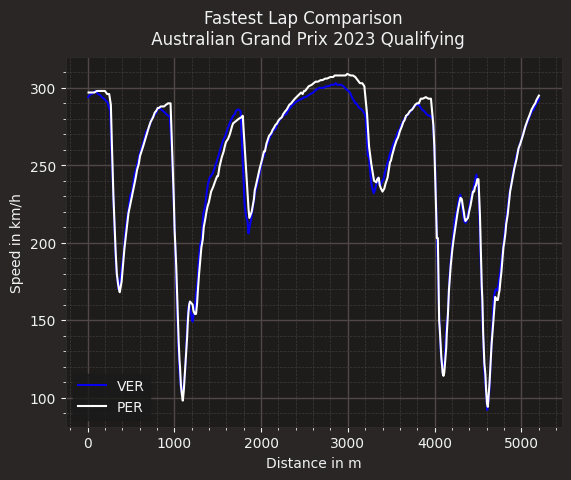

In [23]:
rbr_color = fastf1.plotting.team_color('RBR')
mer_color = fastf1.plotting.team_color('ASM')

fig, ax = plt.subplots()
ax.plot(ver_tel['Distance'], ver_tel['Speed'], color=rbr_color, label='VER')
ax.plot(per_tel['Distance'], per_tel['Speed'], color=mer_color, label='PER')

ax.set_xlabel('Distance in m')
ax.set_ylabel('Speed in km/h')

ax.legend()
plt.suptitle(f"Fastest Lap Comparison \n "
             f"{session.event['EventName']} {session.event.year} Qualifying")

plt.show()

In [24]:
!git status

On branch main
Your branch is up to date with 'origin/main'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   F1_Saudi_Arabia.ipynb
	modified:   fastf1_http_cache.sqlite

no changes added to commit (use "git add" and/or "git commit -a")


In [25]:
!git add Australia.ipynb

In [26]:
!git commit -m "Added fastest lap chart between VER and PER"

On branch main
Your branch is up to date with 'origin/main'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   F1_Saudi_Arabia.ipynb
	modified:   fastf1_http_cache.sqlite

no changes added to commit (use "git add" and/or "git commit -a")


In [27]:
!git push origin main

Everything up-to-date


In [28]:
alo_laps = laps.pick_driver('ALO')
alo_laps

,Time,DriverNumber,LapTime,LapNumber,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,...,Compound,TyreLife,FreshTyre,Stint,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate
116,0 days 01:04:02.677000,14,NaT,1.0,0 days 00:24:18.202000,NaT,NaT,0 days 00:00:18.868000,0 days 00:00:49.346000,NaT,...,MEDIUM,2.0,False,1,0 days 01:02:16.863000,Aston Martin,ALO,24,False,2023-04-02 05:03:18.685
117,0 days 01:06:13.405000,14,0 days 00:02:10.728000,2.0,NaT,NaT,0 days 00:00:47.342000,0 days 00:00:31.930000,0 days 00:00:51.456000,0 days 01:04:50.019000,...,MEDIUM,3.0,False,1,0 days 01:04:02.677000,Aston Martin,ALO,4,False,2023-04-02 05:05:04.499
118,0 days 01:08:22.907000,14,0 days 00:02:09.502000,3.0,NaT,NaT,0 days 00:00:46.721000,0 days 00:00:28.947000,0 days 00:00:53.834000,0 days 01:07:00.126000,...,MEDIUM,4.0,False,1,0 days 01:06:13.405000,Aston Martin,ALO,4,False,2023-04-02 05:07:15.227
119,0 days 01:09:47.200000,14,0 days 00:01:24.293000,4.0,NaT,NaT,0 days 00:00:29.391000,0 days 00:00:18.696000,0 days 00:00:36.206000,0 days 01:08:52.298000,...,MEDIUM,5.0,False,1,0 days 01:08:22.907000,Aston Martin,ALO,1,False,2023-04-02 05:09:24.729
120,0 days 01:11:10.490000,14,0 days 00:01:23.290000,5.0,NaT,NaT,0 days 00:00:28.870000,0 days 00:00:18.573000,0 days 00:00:35.847000,0 days 01:10:16.070000,...,MEDIUM,6.0,False,1,0 days 01:09:47.200000,Aston Martin,ALO,1,True,2023-04-02 05:10:49.022
121,0 days 01:12:33.093000,14,0 days 00:01:22.603000,6.0,NaT,NaT,0 days 00:00:28.656000,0 days 00:00:18.305000,0 days 00:00:35.642000,0 days 01:11:39.146000,...,MEDIUM,7.0,False,1,0 days 01:11:10.490000,Aston Martin,ALO,1,True,2023-04-02 05:12:12.312
122,0 days 01:14:08.448000,14,0 days 00:01:35.355000,7.0,NaT,NaT,0 days 00:00:28.746000,0 days 00:00:18.265000,0 days 00:00:48.344000,0 days 01:13:01.839000,...,MEDIUM,8.0,False,1,0 days 01:12:33.093000,Aston Martin,ALO,24,False,2023-04-02 05:13:34.915
123,0 days 01:32:11.092000,14,NaT,8.0,NaT,0 days 01:16:46.884000,0 days 00:00:47.712000,0 days 00:00:44.908000,NaT,0 days 01:14:56.214000,...,MEDIUM,9.0,False,1,0 days 01:14:08.448000,Aston Martin,ALO,45,False,2023-04-02 05:15:10.270
124,0 days 01:35:48.682000,14,NaT,9.0,0 days 01:32:13.905000,NaT,0 days 00:00:50.693000,0 days 00:00:53.642000,NaT,0 days 01:33:01.701000,...,HARD,1.0,True,2,0 days 01:31:58.608000,Aston Martin,ALO,1,False,2023-04-02 05:33:00.430
125,0 days 01:37:17.350000,14,0 days 00:01:28.668000,10.0,NaT,NaT,0 days 00:00:33.489000,0 days 00:00:18.929000,0 days 00:00:36.250000,0 days 01:36:22.171000,...,HARD,2.0,True,2,0 days 01:35:48.682000,Aston Martin,ALO,1,True,2023-04-02 05:36:50.504


In [29]:
ham_laps = laps.pick_driver('HAM')
ham_laps

,Time,DriverNumber,LapTime,LapNumber,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,...,Compound,TyreLife,FreshTyre,Stint,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate
58,0 days 01:03:57.394000,44,NaT,1.0,0 days 00:26:50.669000,NaT,NaT,0 days 00:00:18.733000,0 days 00:00:45.558000,NaT,...,MEDIUM,1.0,True,1,0 days 01:02:16.863000,Mercedes,HAM,24,False,2023-04-02 05:03:18.685
59,0 days 01:06:09.681000,44,0 days 00:02:12.287000,2.0,NaT,NaT,0 days 00:00:48.710000,0 days 00:00:31.804000,0 days 00:00:51.773000,0 days 01:04:46.104000,...,MEDIUM,2.0,True,1,0 days 01:03:57.394000,Mercedes,HAM,4,False,2023-04-02 05:04:59.216
60,0 days 01:08:21.043000,44,0 days 00:02:11.362000,3.0,NaT,NaT,0 days 00:00:47.074000,0 days 00:00:29.262000,0 days 00:00:55.026000,0 days 01:06:56.755000,...,MEDIUM,3.0,True,1,0 days 01:06:09.681000,Mercedes,HAM,4,False,2023-04-02 05:07:11.503
61,0 days 01:09:44.338000,44,0 days 00:01:23.295000,4.0,NaT,NaT,0 days 00:00:28.776000,0 days 00:00:18.722000,0 days 00:00:35.797000,0 days 01:08:49.819000,...,MEDIUM,4.0,True,1,0 days 01:08:21.043000,Mercedes,HAM,1,False,2023-04-02 05:09:22.865
62,0 days 01:11:07.508000,44,0 days 00:01:23.170000,5.0,NaT,NaT,0 days 00:00:28.837000,0 days 00:00:18.471000,0 days 00:00:35.862000,0 days 01:10:13.175000,...,MEDIUM,5.0,True,1,0 days 01:09:44.338000,Mercedes,HAM,1,True,2023-04-02 05:10:46.160
63,0 days 01:12:30.398000,44,0 days 00:01:22.890000,6.0,NaT,NaT,0 days 00:00:28.755000,0 days 00:00:18.248000,0 days 00:00:35.887000,0 days 01:11:36.263000,...,MEDIUM,6.0,True,1,0 days 01:11:07.508000,Mercedes,HAM,1,True,2023-04-02 05:12:09.330
64,0 days 01:14:04.542000,44,0 days 00:01:34.144000,7.0,NaT,NaT,0 days 00:00:28.603000,0 days 00:00:18.313000,0 days 00:00:47.228000,0 days 01:12:59.001000,...,MEDIUM,7.0,True,1,0 days 01:12:30.398000,Mercedes,HAM,24,False,2023-04-02 05:13:32.220
65,0 days 01:16:56.930000,44,NaT,8.0,NaT,0 days 01:16:42.134000,0 days 00:00:49.426000,0 days 00:00:45.424000,0 days 00:01:17.480000,0 days 01:14:54.026000,...,MEDIUM,8.0,True,1,0 days 01:14:04.542000,Mercedes,HAM,45,False,2023-04-02 05:15:06.364
66,0 days 01:35:11.607000,44,NaT,9.0,0 days 01:32:07.248000,NaT,NaT,0 days 00:00:52.890000,0 days 00:01:18.814000,NaT,...,HARD,1.0,True,2,0 days 01:31:58.608000,Mercedes,HAM,1,False,2023-04-02 05:33:00.430
67,0 days 01:37:15.227000,44,0 days 00:02:03.620000,10.0,NaT,NaT,0 days 00:01:09.310000,0 days 00:00:18.767000,0 days 00:00:35.543000,0 days 01:36:20.917000,...,HARD,2.0,True,2,0 days 01:35:11.607000,Mercedes,HAM,1,True,2023-04-02 05:36:13.429


In [30]:
#Load Verstappen and Perez fastest laps
alo_lap = session.laps.pick_driver('ALO').pick_fastest()
ham_lap = session.laps.pick_driver('HAM').pick_fastest()

In [31]:
alo_tel = alo_lap.get_car_data().add_distance()
ham_tel = ham_lap.get_car_data().add_distance()

/root/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/fastf1/core.py:378: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_slice.loc[:, 'Time'] = data_slice['SessionTime'] - start_time
/root/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/fastf1/core.py:378: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_slice.loc[:, 'Time'] = data_slice['SessionTime'] - start_time


In [ ]:
mrc_color = fastf1.plotting.team_color('MRC')
asm_color = fastf1.plotting.team_color('ASM')

fig, ax = plt.subplots()
ax.plot(ver_tel['Distance'], ver_tel['Speed'], color=mrc_color, label='H')
ax.plot(per_tel['Distance'], per_tel['Speed'], color=mer_color, label='PER')

ax.set_xlabel('Distance in m')
ax.set_ylabel('Speed in km/h')

ax.legend()
plt.suptitle(f"Fastest Lap Comparison \n "
             f"{session.event['EventName']} {session.event.year} Qualifying")

plt.show()